In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_excel("D:\Python.vs\Data Set\Concrete_Data.xls")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

### DATA CLEANING

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [4]:
names = ["Cement", "Blast Furnace Slag", "Fly Ash", "Water", "Superplasticizer","Coarse Aggregate", "Fine Aggregate", "Age", "Concrete Compressive Strength"]

col_names = list(df.columns)

mapper = {}
for i,name in enumerate(col_names):
  mapper[name] = names[i]

df = df.rename(columns = mapper)

In [5]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [9]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete Compressive Strength    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete Compressive Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Exploratory data analysis

In [11]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [12]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Concrete Compressive Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


<AxesSubplot:>

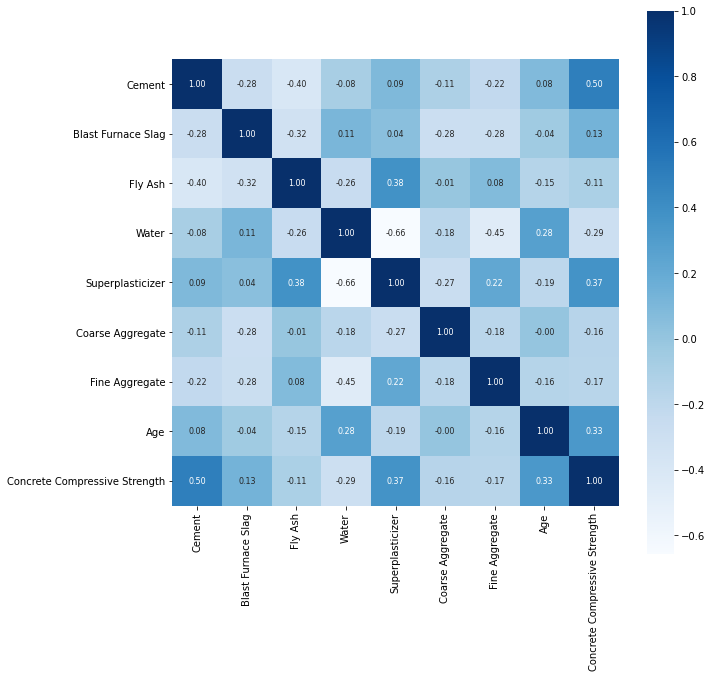

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), cbar=True, square=True, fmt=".2f", annot=True, annot_kws={'size': 8}, cmap="Blues")

There are not any high correlations between Compressive strength and other features except for Cement.

Age and Super plasticizer are other two features which are strongly correlated with Compressive Strength.

<Figure size 720x720 with 0 Axes>

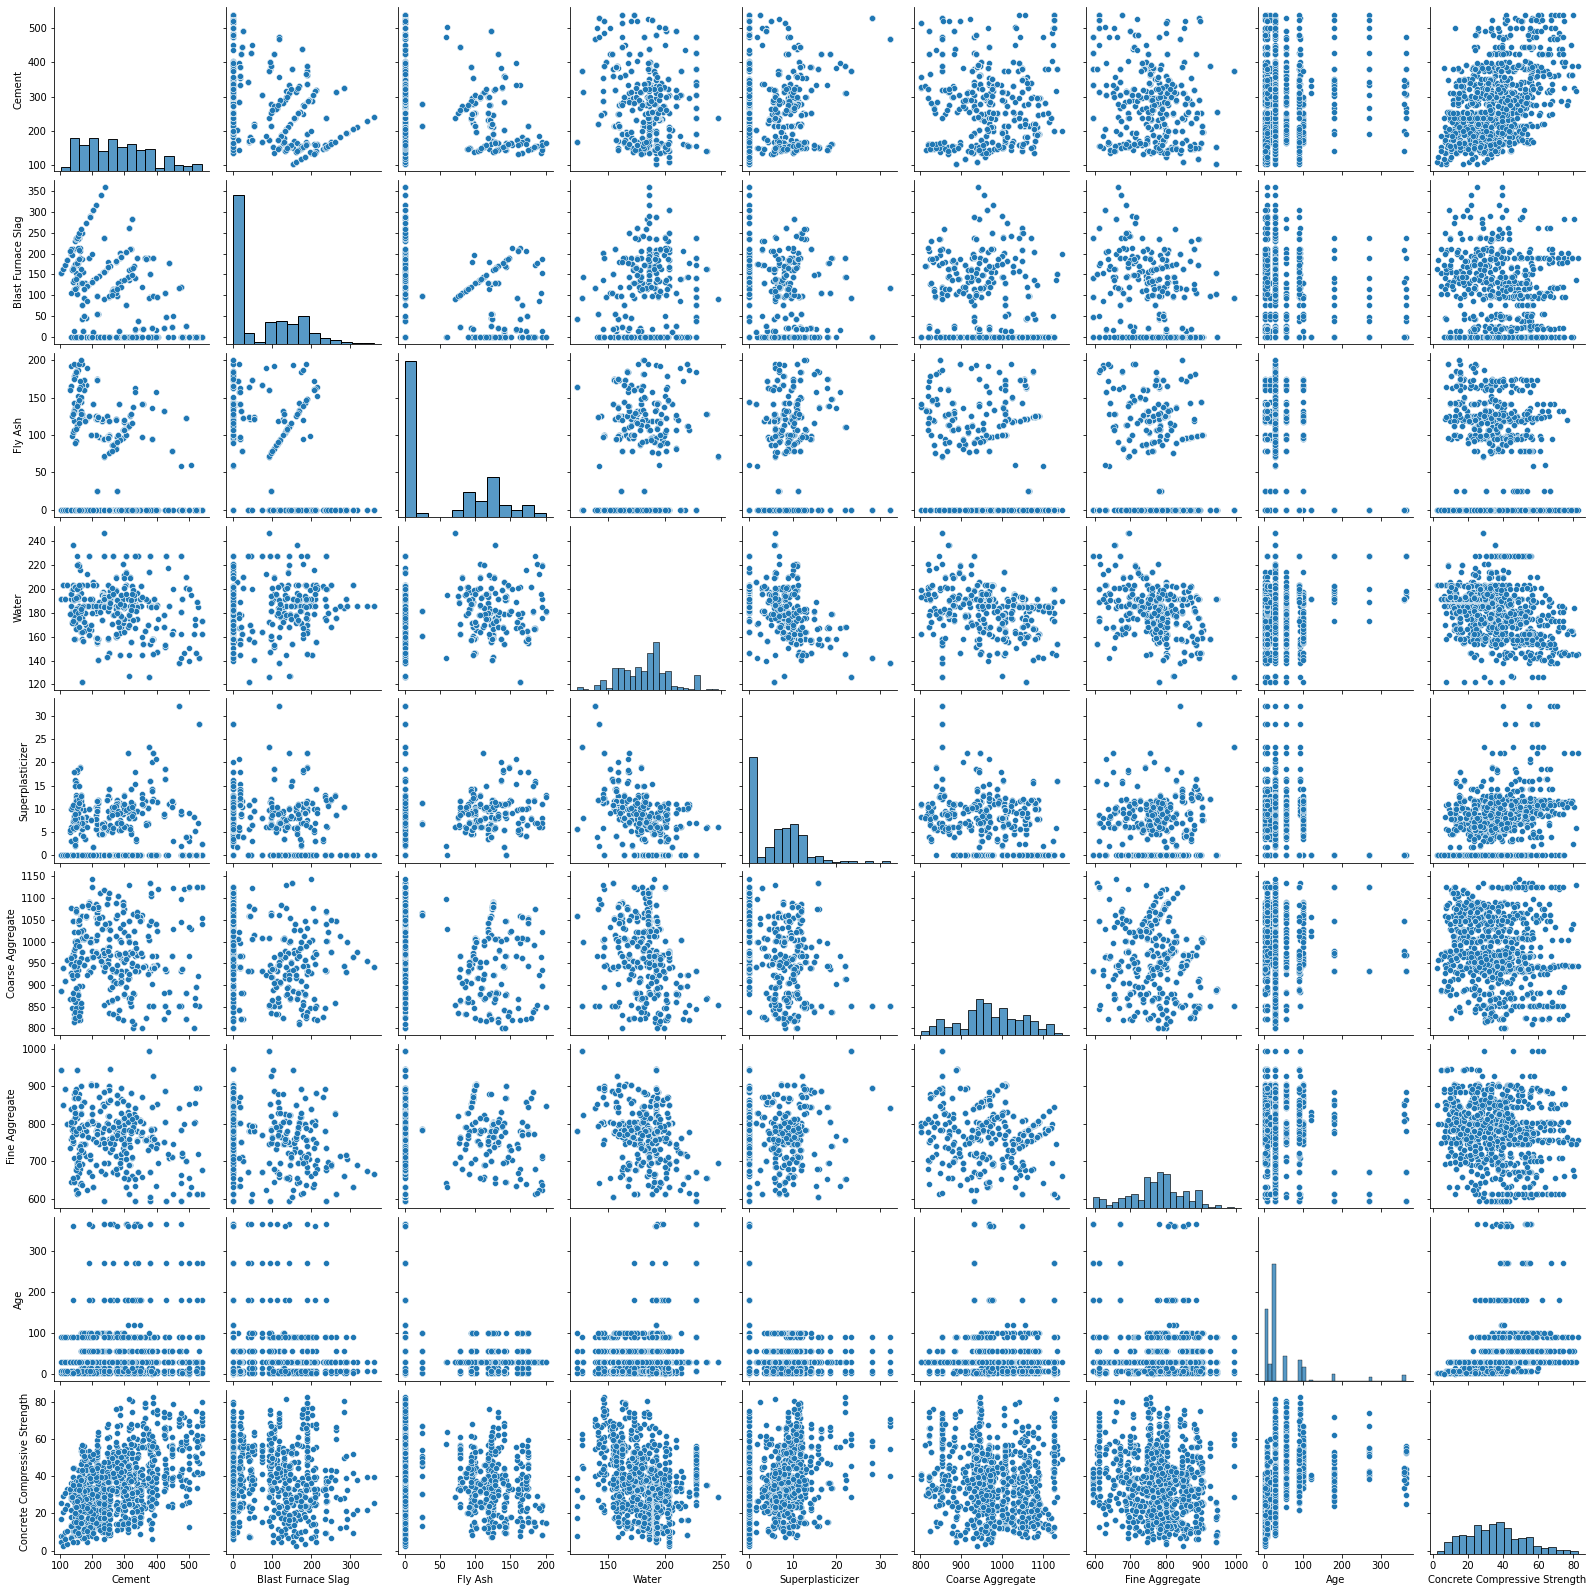

In [16]:
sns.pairplot(df)

Their is no correlation between independent variables.
We can further analyze these correlations visually by plotting these relations.

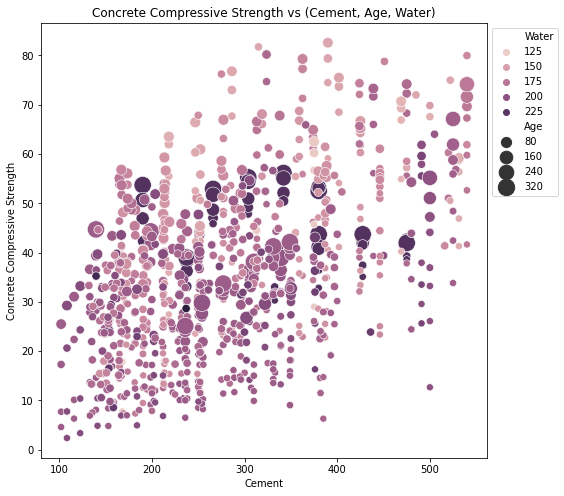

In [159]:
fig,ax = plt.subplots(figsize = (8, 8))
sns.scatterplot(y = 'Concrete Compressive Strength', x = 'Cement', hue = "Water", size = "Age", data = df, ax = ax, sizes = (50,300))
ax.set_title("Concrete Compressive Strength vs (Cement, Age, Water)")
ax.legend(loc = "upper left", bbox_to_anchor = (1, 1))
plt.show()

### Observations
1). Lower the Age more the Cement is required for good Strength.

2). Concrete Compressive strength increases with amount of cement.

3). Concrete Compressive strength is diretcly proportional to Age.

4). Concrete Compressive strength and Water are inversely proportional to each other.

 

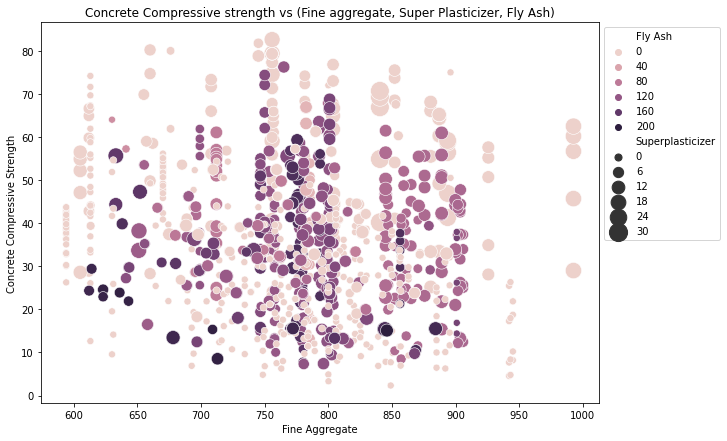

In [160]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(y = "Concrete Compressive Strength", x = "Fine Aggregate", hue = "Fly Ash", size = "Superplasticizer", data = df, ax = ax, sizes = (50, 350))
ax.set_title("Concrete Compressive strength vs (Fine aggregate, Super Plasticizer, Fly Ash)")
ax.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

### Observations
1). Lower the Fly Ash higher the Strength.

2). Superplaticizer and concrete strength are directly proportional.

3). There is no relation between Concrete Strength and Fine Aggregate.

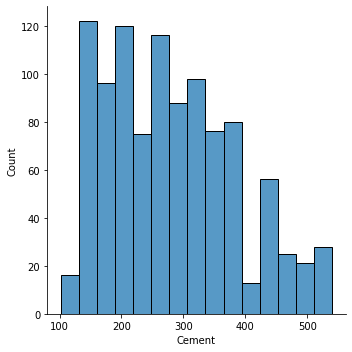

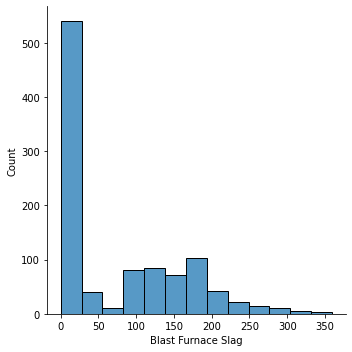

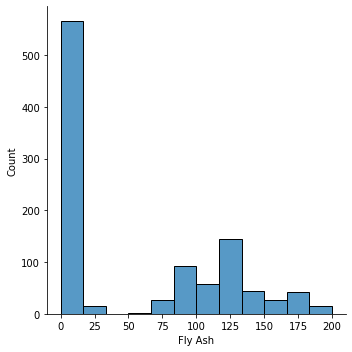

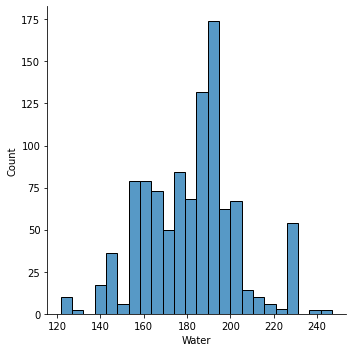

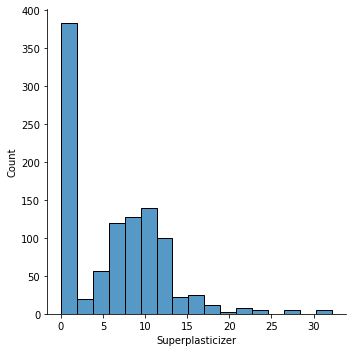

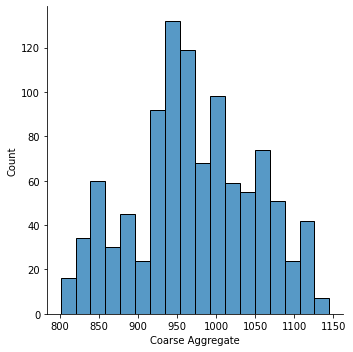

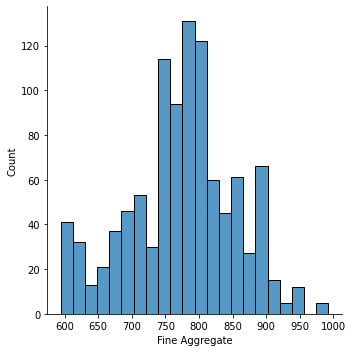

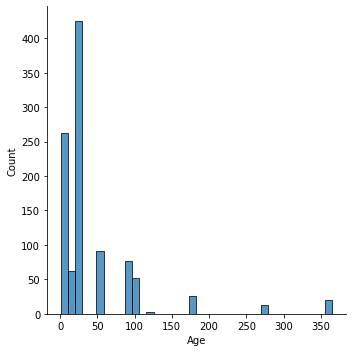

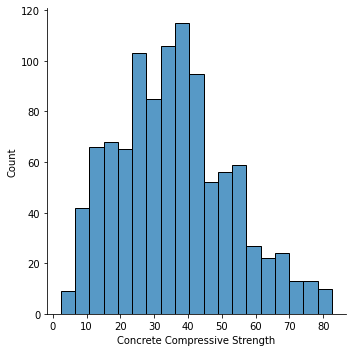

In [234]:
for i in df.columns:
    sns.histplot(df[i], kde = True)
    plt.show()

### Ovservation

1). Most of our Data is Normally Distributed

2). Having said that we have in some columns more number of zeros which are considered as null values so we have to handl them.

In [237]:
zero_col = ["Age", "Blast Furnace Slag", "Fly Ash", "Superplasticizer"]

for i in zero_col:
    df[i] = df[i].replace(0, df[i].mean())


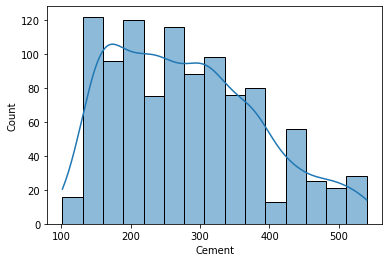

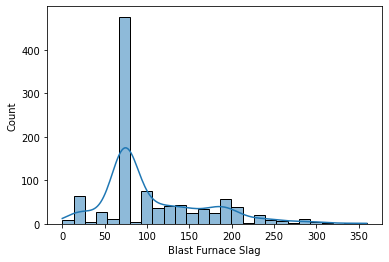

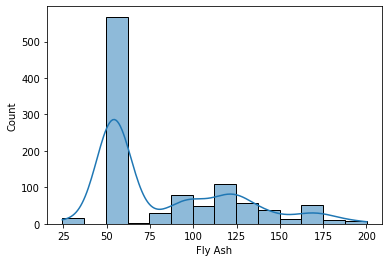

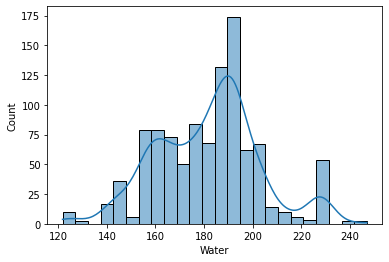

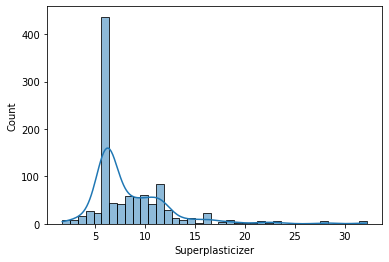

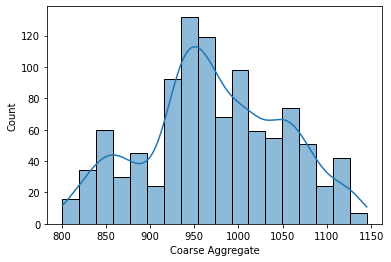

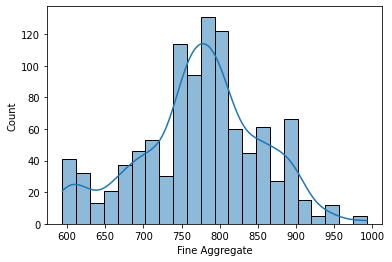

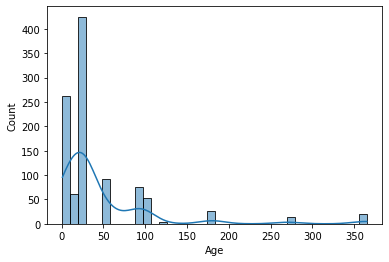

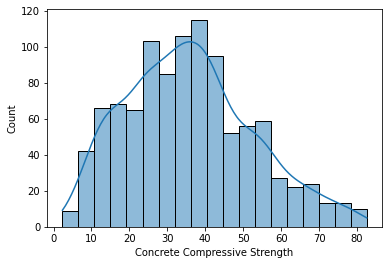

In [238]:
for i in df.columns:
    sns.histplot(df[i], kde = True)
    plt.show()

In [161]:
outliers = ["Blast Furnace Slag", "Water", "Superplasticizer", "Fine Aggregate", "Age"]

In [162]:
for i in outliers:

    # IQR 

    Q1 = df[i].quantile(q = 0.25)
    Q3 = df[i].quantile(q = 0.75)
    IQR = Q3-Q1
    
    print(((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))).sum())

2
9
10
5
59


In [245]:
for i in df.columns:
    df[i] = stats.zscore(df[i])

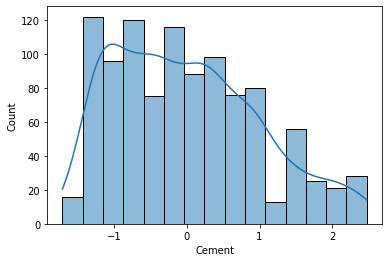

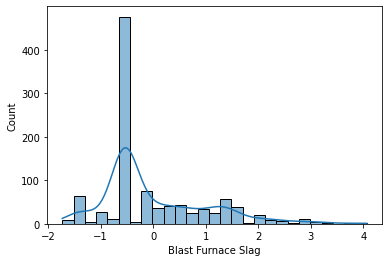

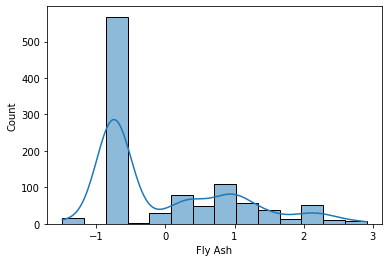

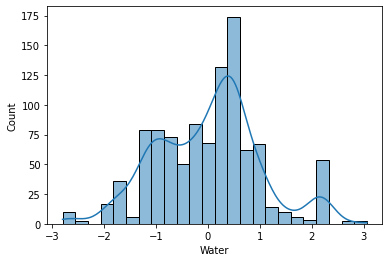

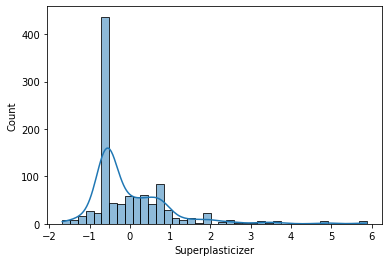

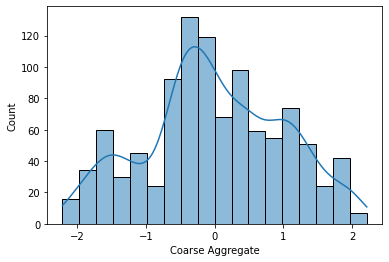

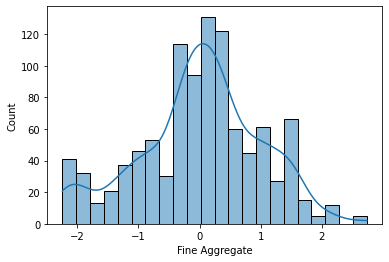

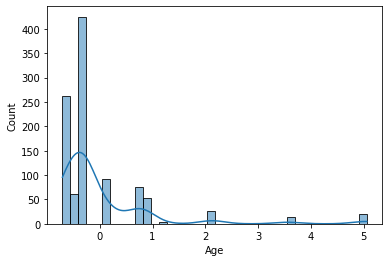

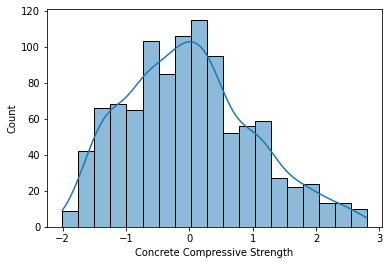

In [246]:
for i in df.columns:
    sns.histplot(df[i], kde = True)
    plt.show()

In [247]:
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [248]:
def Model(data, models):

    x = data.drop("Concrete Compressive Strength", axis = 1)
    y = data["Concrete Compressive Strength"]

    std = StandardScaler()
    x = std.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 112)

    col_names = ["Algo", "MSE", "RMSE", "MAE", "R2"]
    results_train = pd.DataFrame(columns = col_names)
    results_test = pd.DataFrame(columns = col_names)

    i = 0
    for name, model in models:

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error, R2 = eval_metrics_train(y_train, x_train_pred)
        results_train.loc[i] = [name, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error, R2]

        x_test_pred = model.predict(x_test)
        Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error, R2 = eval_metrics_train(y_test, x_test_pred)
        results_test.loc[i] = [name, Mean_Squared_Error, Root_Mean_Squared_Error, Mean_Absolute_Error, R2]
        i += 1
        

    return(results_train, results_test)

In [249]:
def eval_metrics_train(target, pred):
        
        mse = mean_squared_error(target, pred)
        rmse = np.sqrt(mean_squared_error(target, pred))
        score = mean_absolute_error(target, pred)
        r2 = r2_score(target, pred)
        

        return(mse, rmse, score, r2)

In [250]:
def eval_metrics_test(target, pred):
        
        mse = mean_squared_error(target, pred)
        rmse = np.sqrt(mean_squared_error(target, pred))
        score = mean_absolute_error(target, pred) 
        r2 = r2_score(target, pred)
        

        return(mse, rmse, score, r2)

In [252]:
models = []
models.append(("SVM", SVR()))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))
models.append(("XGB Regressor", XGBRegressor()))
models.append(("Linear Regression", LinearRegression()))
models.append(("AdaBoost Regressor", AdaBoostRegressor()))
models.append(("K-Neighbors Regressor", KNeighborsRegressor()))
models.append(("Random Forest Regressor", RandomForestRegressor()))
models.append(("Decision Tree Regressor",  DecisionTreeRegressor()))


In [253]:
Model(df, models)

(                      Algo       MSE      RMSE       MAE        R2
 0                      SVM  0.129033  0.359212  0.257912  0.873917
 1                    Ridge  0.413839  0.643304  0.504994  0.595622
 2                    Lasso  1.023398  1.011631  0.818707  0.000000
 3            XGB Regressor  0.001061  0.032569  0.019767  0.998964
 4        Linear Regression  0.413834  0.643299  0.504763  0.595628
 5       AdaBoost Regressor  0.188247  0.433875  0.368078  0.816057
 6    K-Neighbors Regressor  0.207435  0.455451  0.350561  0.797307
 7  Random Forest Regressor  0.013189  0.114844  0.081161  0.987112
 8  Decision Tree Regressor  0.000172  0.013115  0.001497  0.999832,
                       Algo       MSE      RMSE       MAE        R2
 0                      SVM  0.157826  0.397273  0.302599  0.828921
 1                    Ridge  0.418599  0.646992  0.509891  0.546251
 2                    Lasso  0.932478  0.965649  0.764130 -0.010779
 3            XGB Regressor  0.105787  0.325249